In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

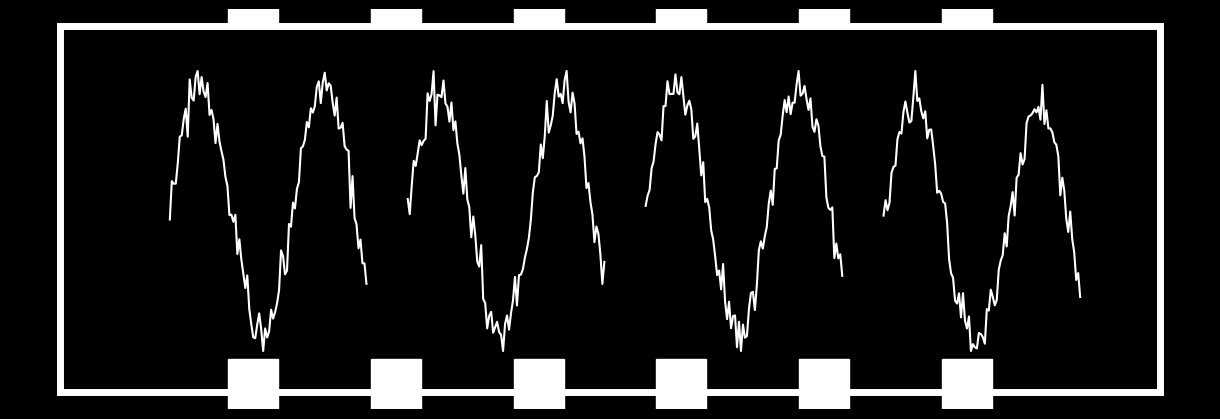

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Create the main figure
fig, axes = plt.subplots(1, 4, figsize=(12, 4), facecolor="black", gridspec_kw={'wspace': 0.1})

# Function to generate random data for subplots
def random_data():
    x = np.linspace(0, 10, 100)
    y = np.sin(x) + np.random.normal(scale=0.1, size=x.shape)
    return x, y

# Loop through subplots to create plots
for ax in axes:
    x, y = random_data()
    ax.plot(x, y, color="white")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)  # Hide default frame

# Add outer filmstrip border
ax_outer = fig.add_axes([0, 0, 1, 1], zorder=-1)  # Full figure overlay
ax_outer.set_xticks([])
ax_outer.set_yticks([])
ax_outer.set_frame_on(False)
ax_outer.set_xlim(-0.1, 1.1)
ax_outer.set_ylim(-0.1, 1.1)

# Create the filmstrip border
border = patches.Rectangle((-0.05, -0.05), 1.1, 1.1, linewidth=5, edgecolor="white", facecolor="black")
ax_outer.add_patch(border)

# Add perforations (film holes) at top and bottom
num_perforations = 6  # Number of holes
hole_width = 0.05
hole_height = 0.15
spacing = 1 / (num_perforations + 1)

for i in range(num_perforations):
    x_pos = (i + 1) * spacing
    ax_outer.add_patch(patches.Rectangle((x_pos - hole_width / 2, 1.05), hole_width, hole_height, color="white"))
    ax_outer.add_patch(patches.Rectangle((x_pos - hole_width / 2, -0.1), hole_width, hole_height, color="white"))

# Show the filmstrip figure
plt.show()


/tmp/ipykernel_3136233/3269371409.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filtered = df.groupby('bin', group_keys=False).apply(remove_outliers)


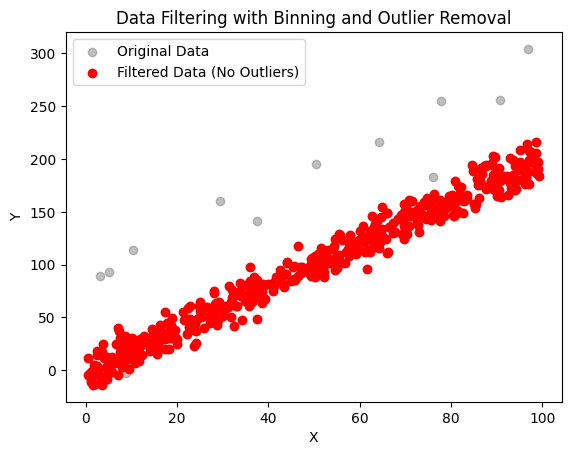

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic dataset (replace with your real data)
np.random.seed(42)
x = np.random.uniform(0, 100, 500)  # Random x values
y = 2 * x + np.random.normal(0, 10, 500)  # y = 2x + noise

# Introduce some outliers
y[::50] += np.random.uniform(50, 100, len(y[::50]))

# Create DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Number of bins
n_bins = 10

# Sort by x values
df = df.sort_values(by='x')

# Define bin edges
df['bin'] = pd.qcut(df['x'], n_bins, labels=False)  # Equal count bins

# Function to remove outliers per bin
def remove_outliers(group):
    Q1 = group['y'].quantile(0.25)
    Q3 = group['y'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group['y'] >= lower_bound) & (group['y'] <= upper_bound)]

# Apply outlier filtering per bin
df_filtered = df.groupby('bin', group_keys=False).apply(remove_outliers)

# Plot original and filtered data
plt.scatter(df['x'], df['y'], color='gray', alpha=0.5, label="Original Data")
plt.scatter(df_filtered['x'], df_filtered['y'], color='red', label="Filtered Data (No Outliers)")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data Filtering with Binning and Outlier Removal")
plt.show()


In [43]:
colors = ["tab:blue", "tab:orange","tab:green","tab:purple","tab:brown","tab:pink"]

In [44]:
local_map = pd.read_csv("../../dynamic_framework/measurements/local/map.csv")

In [45]:
jpeg_map = pd.read_csv("../measurements/jpeg_per_frame/map.csv")
decom_map= pd.read_csv("../measurements/decomposition_per_frame/map.csv")
reg_map = pd.read_csv("../measurements/regression_per_frame/map.csv")

In [46]:
pruning_general=0.3

## JPEG

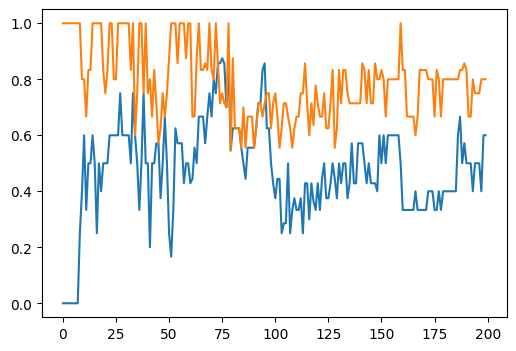

In [47]:
plt.figure(figsize=(6,4))
map_df_group = jpeg_map.groupby("pruning_thresh")
map_df = map_df_group.get_group(pruning_general)
quality_df = map_df.groupby("quality")
plot_df= quality_df.get_group(80)
plt.plot(plot_df["sensitivity"].to_numpy())
plt.plot(local_map["sensitivity"].to_numpy())

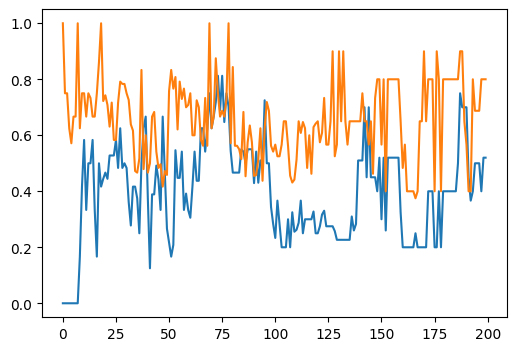

In [48]:
plt.figure(figsize=(6,4))
map_df_group = jpeg_map.groupby("pruning_thresh")
map_df = map_df_group.get_group(pruning_general)
quality_df = map_df.groupby("quality")
plot_df= quality_df.get_group(80)
plt.plot(plot_df["map"].to_numpy())
plt.plot(local_map["map"].to_numpy())

## Decomposition

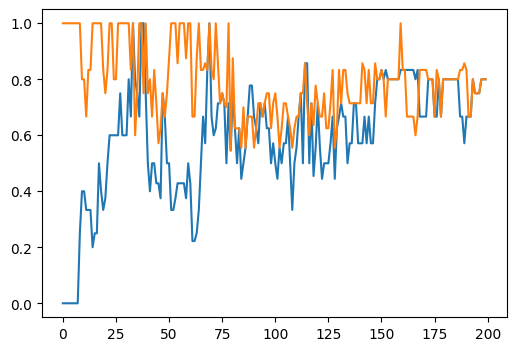

In [49]:
plt.figure(figsize=(6,4))
map_df_group = decom_map.groupby("pruning_thresh")
map_df = map_df_group.get_group(pruning_general)
quality_df = map_df.groupby("quality")
plot_df= quality_df.get_group(2)
plt.plot(plot_df["sensitivity"].to_numpy())
plt.plot(local_map["sensitivity"].to_numpy())

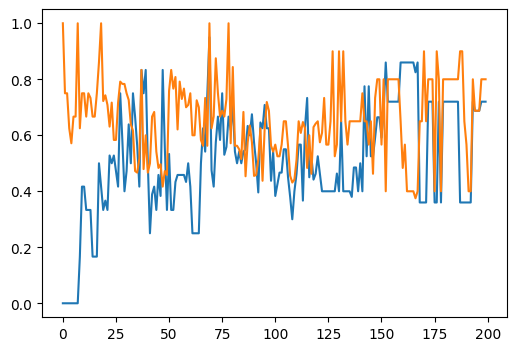

In [50]:
plt.figure(figsize=(6,4))
map_df_group = decom_map.groupby("pruning_thresh")
map_df = map_df_group.get_group(pruning_general)
quality_df = map_df.groupby("quality")
plot_df= quality_df.get_group(2)
plt.plot(plot_df["map"].to_numpy())
plt.plot(local_map["map"].to_numpy())

## Regression

In [51]:
plt.figure(figsize=(6,4))
map_df_group = reg_map.groupby("pruning_thresh")
map_df = map_df_group.get_group(pruning_general)
quality_df = map_df.groupby("quality")
plot_df= quality_df.get_group(2)
plt.plot(plot_df["sensitivity"].to_numpy())
plt.plot(local_map["sensitivity"].to_numpy())

KeyError: 0.3

<Figure size 600x400 with 0 Axes>

In [52]:
plt.figure(figsize=(6,4))
map_df_group = reg_map.groupby("pruning_thresh")
map_df = map_df_group.get_group(pruning_general)
quality_df = map_df.groupby("quality")
plot_df= quality_df.get_group(2)
plt.plot(plot_df["map"].to_numpy())
plt.plot(local_map["map"].to_numpy())

KeyError: 0.3

<Figure size 600x400 with 0 Axes>